In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import root

In [2]:
"FUNCIONES"

def MgL_M(A, α, K, n, px, pm, N):
    
    # Productividad Marginal del trabajo en el sector moderno
    
    return 1.5*α*A*K**(1 - α)*N**(α-1)*(1 - n*pm/px)

def MgL_T(B, γ, E):
    
    # Productividad Marginal del trabajo en el sector tradicional

    return γ*B*E**(γ - 1) 

def underemployment_T(B, γ, v):
    
    # Empleo en el mercado de trabajo del sector tradicional

    return (v/(γ*B))**(1/(γ - 1)) 

def labor_market(A, α, K, n, px, pm, W, N):
    
    # Mercado de trabajo del sector moderno (en función de la inversa del tipo de cambio)
    
    return 1.5*α*A*K**(1 - α)*N**(α - 1)*((px - n*pm)/W) 

def money_market(κ, β, M, W, px, N):
    
    # Mercado de dinero (en función de la inversa del tipo de cambio)

    return ((px**(1 - β)*κ*(W*N)**β)/M)**(1/(1 - β))

In [3]:
"PARÁMETROS"

escenarios = 5

A     = 1      # Productividad Total de Factores del sector moderno
B     = 0.85   # Productividad Total de Factores del sector tradicional
α     = 0.35   # Elasticidad del factor trabajo del sector moderno
γ     = 0.5    # Elasticidad del factor trabajo del sector tradicional
κ     = 3.2    # Coeficiente de la demanda de dinero
c     = 0.55   # Premio por la disciplina laboral
ρ     = 0.55   # Probabilidad de emplearse en el sector moderno
β     = 0.78   # Elasticidad ingreso de la demanda de dinero
W     = 0.05   # Tasa de salario nominal 
n     = 0.18   # Coeficiente tecnológico del bien importado
pm    = 1.1    # Precio internacional de importación

K     = np.full(escenarios, 6, dtype = float)      # Stock de capital del sector moderno
M     = np.full(escenarios, 1.5, dtype = float)    # Cantidad de dinero ofertada
S     = np.full(escenarios, 25, dtype = float)     # Población total
px    = np.full(escenarios, 1.35, dtype = float)   # Precio internacional de exportación



In [4]:
"SHOCKS"

for i in range (1, escenarios):
    
    if i == 1:
        
    # Shock positivo del stock del capital
    
        K[i] = 8.5
       
    if i == 2:
        
    # Shock positivo de la cantidad de dinero ofertada    
        
        M[i] = 1.7  
        
    if i == 3:
    
    # Shock positivo de la población total
    
        S[i] = 28  
        
    if i == 4:

    # Shock positivo del precio internacional de exportación

        px[i] = 2.5  

In [5]:
"CURVAS DE PRODUCTIVIDADES MARGINALES"

N     = {} 
MGLM  = {} # Productividad marginal del sector moderno
MGLT  = {} # Productividad marginal del sector tradicional
EMGLT = {} # Extracción del esfuerzo salarial

for i in range(0, escenarios):
    
    N['e{0}'.format(i)]      = np.arange(0.1, S[i], 0.01) 
    MGLM['e{0}'.format(i)]   = MgL_M(A, α, K[i], n, px[i], pm, N['e{0}'.format(i)])
    MGLT['e{0}'.format(i)]   = MgL_T(B, γ, N['e{0}'.format(i)])
    EMGLT['e{0}'.format(i)]  = (1 + c)*MgL_T(B, γ, N['e{0}'.format(i)])

In [6]:
"EQUILIBRIO"

N_walrasian = {} # Empleo walrasiano 
w_walrasian = {} # Salario walrasiano

Nfull_nonwalrasian = {} # Máximo empleo no walrasiano 
wfull_nonwalrasian = {} # Salario de máximo empleo no walrasiano 
 
N_star = {} # Empleo de equilibrio no walrasiano
w_star = {} # Salario de equilibrio no walrasiano

v_full = {} # Máximo empleo en el sector tradicional
N_full = {} # Salario de máximo empleo en el sector tradicional

NT_star= {} # Empleo de equilibrio del sector tradicional
v_star = {} # Salario de equilibrio del sector tradicional


for i in range (0, escenarios):
    
    W = 0.05
    
    # Equilibrio walrasiano en el mercado de trabajo
    
    def walrasian_equilibrium_labormarket(N):
        
        return MgL_M(A, α, K[i], n, px[i], pm, N) - MgL_T(B, γ, S[i] - N)
    
    N_walrasian['e{0}'.format(i)]  = root(walrasian_equilibrium_labormarket, 15).x[0]
    w_walrasian['e{0}'.format(i)]  = MgL_M(A, α, K[i], n, px[i], pm, N_walrasian['e{0}'.format(i)])
    
    # Equilibrio no walrasiano de máximo empleo 
    
    def full_non_walrasian_equilibrium_labormarket(N):
        
        return MgL_M(A, α, K[i], n, px[i], pm, N) - (1 + c)*MgL_T(B, γ, S[i] - N)
        
    Nfull_nonwalrasian['e{0}'.format(i)] = root(full_non_walrasian_equilibrium_labormarket, 15).x[0]
    wfull_nonwalrasian['e{0}'.format(i)] = MgL_M(A, α, K[i], n, px[i], pm, Nfull_nonwalrasian['e{0}'.format(i)])
    
    # Equilibrio general no walrasiano en el mercado de trabajo del sector moderno
    
    def general_equilibrium(N):
        
        return labor_market(A, α, K[i], n, px[i], pm, W, N) - money_market(κ, β, M[i], W, px[i],  N)
    
    N_star['e{0}'.format(i)]  = root(general_equilibrium, 15).x[0]
    w_star['e{0}'.format(i)]  = MgL_M(A, α, K[i], n, px[i], pm, N_star['e{0}'.format(i)])
    
    
    # Equilibrio en el sector de tradicional

    v_full['e{0}'.format(i)]  = MgL_T(B, γ, S[i] - N_star['e{0}'.format(i)])    
    
    # Condición del salario esperado
    
    if ρ*w_star['e{0}'.format(i)] > v_full['e{0}'.format(i)]:
        
        v_star['e{0}'.format(i)]   = ρ*w_star['e{0}'.format(i)]
        
        NT_star['e{0}'.format(i)]  = underemployment_T(B, γ, v_star['e{0}'.format(i)])
    
    else:
        
        v_star['e{0}'.format(i)] = v_full['e{0}'.format(i)]
        
        NT_star['e{0}'.format(i)]  =  underemployment_T(B, γ, v_star['e{0}'.format(i)])
    
    # Condición de esfuerzo laboral en el sector moderno

    while w_star['e{0}'.format(i)] < wfull_nonwalrasian['e{0}'.format(i)]:
        
        W = W + 0.001
        
        def general_equilibrium(N):
            
            return labor_market(A, α, K[i], n, px[i], pm, W, N) - money_market(κ, β, M[i], W, px[i], N)
    
        N_star['e{0}'.format(i)]  = root(general_equilibrium, 15).x[0]
        w_star['e{0}'.format(i)]  = MgL_M(A, α, K[i], n, px[i], pm, N_star['e{0}'.format(i)])
        v_full['e{0}'.format(i)]  = MgL_T(B, γ, S[i] - N_star['e{0}'.format(i)])    
        
        # Condición del salario esperado
        
        if ρ*w_star['e{0}'.format(i)] > v_full['e{0}'.format(i)]:
            
            v_star['e{0}'.format(i)] = ρ*w_star['e{0}'.format(i)]
            
            NT_star['e{0}'.format(i)] = underemployment_T(B, γ, v_star['e{0}'.format(i)])
    
        else:
            
            v_star['e{0}'.format(i)] = v_full['e{0}'.format(i)]
            
            NT_star['e{0}'.format(i)] = underemployment_T(B, γ, v_star['e{0}'.format(i)])
        
    else:
        
        continue    

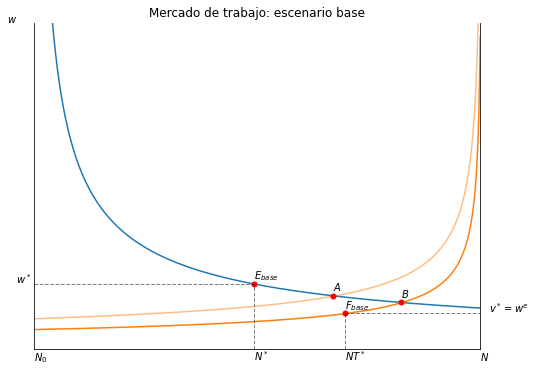

In [7]:
"ESCENARIO 0: BASE"
xmin, xmax, ymin, ymax = 0, S[0], 0, 1.4

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(N['e0'], MGLM['e0'], color= 'C00')
ax.plot(sorted(N['e0'], reverse=True), sorted(MGLT['e1'], reverse=True), color= 'C01')
ax.plot(sorted(N['e0'], reverse=True), sorted(EMGLT['e1'], reverse=True), color= 'C01', alpha = 0.5)
ax.plot(N_star['e0'], w_star['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(S[1] - NT_star['e0'], v_star['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(N_walrasian['e0'], w_walrasian['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(Nfull_nonwalrasian['e0'], wfull_nonwalrasian['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([N_star['e0'], N_star['e0']], [0, w_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, N_star['e0']], [w_star['e0'], w_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[0] - NT_star['e0'], S[0] - NT_star['e0']], [0, v_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[0] - NT_star['e0'], S[0]], [v_star['e0'], v_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Mercado de trabajo: escenario base')
ax.text(- 1, w_star['e0'], '$w^*$')
ax.text(N_star['e0'], - 0.05, '$N^*$')
ax.text(S[0] - NT_star['e0'], - 0.05, '$NT^*$')
ax.text(xmax + 0.5, v_star['e0'], '$v^*=w^e$')
ax.text(- 1.5, ymax, '$w$')
ax.text(xmax, - 0.05, '$N$')
ax.text(xmin, - 0.05, '$N_{0}$')
ax.text(Nfull_nonwalrasian['e0'], wfull_nonwalrasian['e0'] + 0.02, '$A$')
ax.text(N_walrasian['e0'], w_walrasian['e0'] + 0.02, '$B$')
ax.text(N_star['e0'], w_star['e0'] + 0.02, '$E_{base}$')
ax.text(S[0] - NT_star['e0'], v_star['e0'] + 0.02, '$F_{base}$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

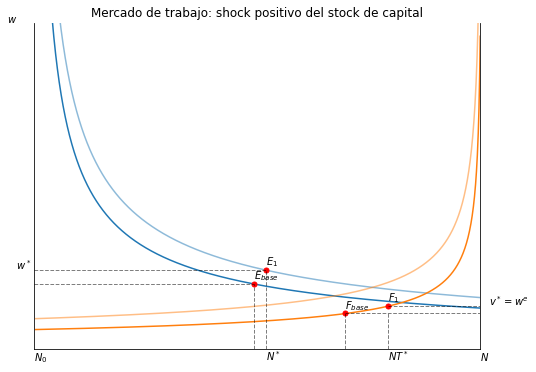

In [8]:
"ESCENARIO 1: SHOCK POSITIVO DEL STOCK DE CAPITAL"
resolution_value = 1200

xmin, xmax, ymin, ymax = 0, S[1], 0, 1.4

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(N['e1'], MGLM['e0'], color= 'C00')
ax.plot(N['e1'], MGLM['e1'], color= 'C00', alpha = 0.5)
ax.plot(sorted(N['e1'], reverse=True), sorted(MGLT['e1'], reverse=True), color= 'C01')
ax.plot(sorted(N['e1'], reverse=True), sorted(EMGLT['e1'], reverse=True), color= 'C01', alpha = 0.5)
ax.plot(N_star['e0'], w_star['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(S[1] - NT_star['e0'], v_star['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(N_star['e1'], w_star['e1'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(S[1] - NT_star['e1'], v_star['e1'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([N_star['e0'], N_star['e0']], [0, w_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, N_star['e0']], [w_star['e0'], w_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[0] - NT_star['e0'], S[0] - NT_star['e0']], [0, v_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[0] - NT_star['e0'], S[0]], [v_star['e0'], v_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([N_star['e1'], N_star['e1']], [0, w_star['e1']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, N_star['e1']], [w_star['e1'], w_star['e1']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[0] - NT_star['e1'], S[0] - NT_star['e1']], [0, v_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[0] - NT_star['e1'], S[0]], [v_star['e1'], v_star['e1']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Mercado de trabajo: shock positivo del stock de capital')
ax.text(- 1, w_star['e1'], '$w^*$')
ax.text(N_star['e1'], - 0.05, '$N^*$')
ax.text(S[0] - NT_star['e1'], - 0.05, '$NT^*$')
ax.text(xmax + 0.5, v_star['e1'], '$v^*=w^e$')
ax.text(- 1.5, ymax, '$w$')
ax.text(xmax, - 0.05, '$N$')
ax.text(xmin, - 0.05, '$N_{0}$')
ax.text(N_star['e1'], w_star['e1'] + 0.02, '$E_{1}$')
ax.text(S[1] - NT_star['e1'], v_star['e1'] + 0.02, '$F_{1}$')
ax.text(N_star['e0'], w_star['e0'] + 0.02, '$E_{base}$')
ax.text(S[1] - NT_star['e0'], v_star['e0'] + 0.02, '$F_{base}$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.savefig('Omega_model_shock.png', format="jpg", dpi=resolution_value)
plt.show()

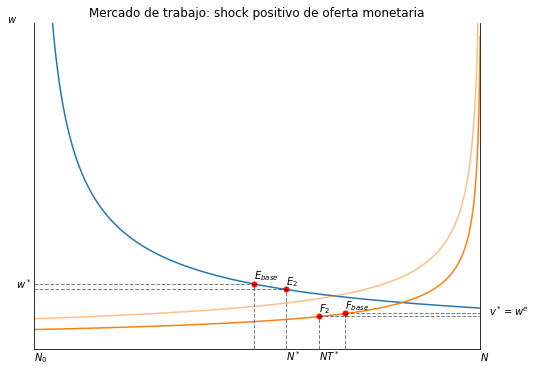

In [9]:
"ESCENARIO 2: SHOCK POSITIVO DE LA OFERTA MONETARIA "

xmin, xmax, ymin, ymax = 0, S[2], 0, 1.4

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(N['e2'], MGLM['e2'], color= 'C00')
ax.plot(sorted(N['e2'], reverse=True), sorted(MGLT['e1'], reverse=True), color= 'C01')
ax.plot(sorted(N['e2'], reverse=True), sorted(EMGLT['e1'], reverse=True), color= 'C01', alpha = 0.5)
ax.plot(N_star['e0'], w_star['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(S[1] - NT_star['e0'], v_star['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(N_star['e2'], w_star['e2'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(S[1] - NT_star['e2'], v_star['e2'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([N_star['e0'], N_star['e0']], [0, w_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, N_star['e0']], [w_star['e0'], w_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[0] - NT_star['e0'], S[0] - NT_star['e0']], [0, v_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[0] - NT_star['e0'], S[0]], [v_star['e0'], v_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([N_star['e2'], N_star['e2']], [0, w_star['e2']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, N_star['e2']], [w_star['e2'], w_star['e2']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[0] - NT_star['e2'], S[0] - NT_star['e2']], [0, v_star['e2']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[0] - NT_star['e2'], S[0]], [v_star['e2'], v_star['e2']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Mercado de trabajo: shock positivo de oferta monetaria')
ax.text(- 1, w_star['e2'], '$w^*$')
ax.text(N_star['e2'], - 0.05, '$N^*$')
ax.text(S[0] - NT_star['e2'], - 0.05, '$NT^*$')
ax.text(xmax + 0.5, v_star['e2'], '$v^*=w^e$')
ax.text(- 1.5, ymax, '$w$')
ax.text(xmax, - 0.05, '$N$')
ax.text(xmin, - 0.05, '$N_{0}$')
ax.text(N_star['e2'], w_star['e2'] + 0.02, '$E_{2}$')
ax.text(S[2] - NT_star['e2'], v_star['e2'] + 0.02, '$F_{2}$')
ax.text(N_star['e0'], w_star['e0'] + 0.02, '$E_{base}$')
ax.text(S[2] - NT_star['e0'], v_star['e0'] + 0.02, '$F_{base}$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

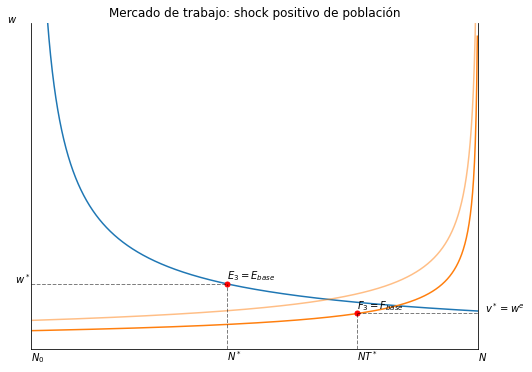

In [10]:
"ESCENARIO 3: SHOCK POSITIVO DE LA POBLACIÓN"

xmin, xmax, ymin, ymax = 0, S[3], 0, 1.4

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(N['e3'], MGLM['e3'], color= 'C00')
ax.plot(sorted(N['e3'], reverse=True), sorted(MGLT['e3'], reverse=True), color= 'C01')
ax.plot(sorted(N['e3'], reverse=True), sorted(EMGLT['e3'], reverse=True), color= 'C01', alpha = 0.5)
ax.plot(N_star['e3'], w_star['e3'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(S[3] - NT_star['e3'], v_star['e3'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([N_star['e3'], N_star['e3']], [0, w_star['e3']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, N_star['e3']], [w_star['e3'], w_star['e3']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[3] - NT_star['e3'], S[3] - NT_star['e3']], [0, v_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[3] - NT_star['e3'], S[3]], [v_star['e3'], v_star['e3']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Mercado de trabajo: shock positivo de población')
ax.text(- 1, w_star['e3'], '$w^*$')
ax.text(N_star['e3'], - 0.05, '$N^*$')
ax.text(S[3] - NT_star['e3'], - 0.05, '$NT^*$')
ax.text(xmax + 0.5, v_star['e3'], '$v^*=w^e$')
ax.text(- 1.5, ymax, '$w$')
ax.text(xmax, - 0.05, '$N$')
ax.text(xmin, - 0.05, '$N_{0}$')
ax.text(N_star['e3'], w_star['e3'] + 0.02, '$E_{3} = E_{base}$')
ax.text(S[3] - NT_star['e3'], v_star['e3'] + 0.02, '$F_{3} = F_{base}$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

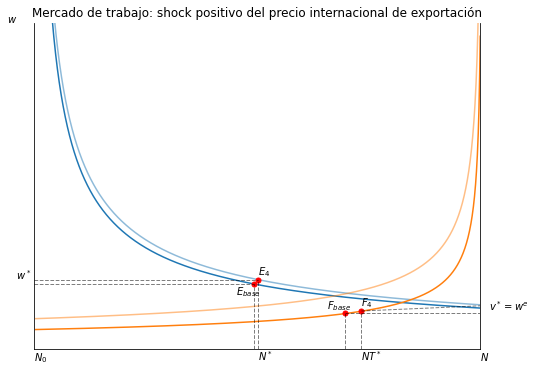

In [11]:
"ESCENARIO 4: SHOCK POSITIVO DEL PRECIO INTERNACIONAL DE EXPORTACIÓN"

xmin, xmax, ymin, ymax = 0, S[4], 0, 1.4

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(N['e4'], MGLM['e0'], color= 'C00')
ax.plot(N['e4'], MGLM['e4'], color= 'C00', alpha = 0.5)
ax.plot(sorted(N['e4'], reverse=True), sorted(MGLT['e4'], reverse=True), color= 'C01')
ax.plot(sorted(N['e4'], reverse=True), sorted(EMGLT['e4'], reverse=True), color= 'C01', alpha = 0.5)
ax.plot(N_star['e0'], w_star['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(S[1] - NT_star['e0'], v_star['e0'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(N_star['e4'], w_star['e4'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot(S[1] - NT_star['e4'], v_star['e4'], marker = '.', markersize = 10, markeredgecolor = 'red', markerfacecolor = 'red')
ax.plot([N_star['e0'], N_star['e0']], [0, w_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, N_star['e0']], [w_star['e0'], w_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[0] - NT_star['e0'], S[0] - NT_star['e0']], [0, v_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[0] - NT_star['e0'], S[0]], [v_star['e0'], v_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([N_star['e4'], N_star['e4']], [0, w_star['e4']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([0, N_star['e4']], [w_star['e4'], w_star['e4']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[0] - NT_star['e4'], S[0] - NT_star['e4']], [0, v_star['e0']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.plot([S[0] - NT_star['e4'], S[0]], [v_star['e4'], v_star['e1']], c = 'black', ls='--', lw = 1, alpha = 0.5)
ax.set_title('Mercado de trabajo: shock positivo del precio internacional de exportación')
ax.text(- 1, w_star['e4'], '$w^*$')
ax.text(N_star['e4'], - 0.05, '$N^*$')
ax.text(S[0] - NT_star['e4'], - 0.05, '$NT^*$')
ax.text(xmax + 0.5, v_star['e4'], '$v^*=w^e$')
ax.text(- 1.5, ymax, '$w$')
ax.text(xmax, - 0.05, '$N$')
ax.text(xmin, - 0.05, '$N_{0}$')
ax.text(N_star['e4'], w_star['e4'] + 0.02, '$E_{4}$')
ax.text(S[4] - NT_star['e4'], v_star['e4'] + 0.02, '$F_{4}$')
ax.text(N_star['e0'] - 1, w_star['e0'] - 0.05, '$E_{base}$')
ax.text(S[4] - NT_star['e0'] - 1, v_star['e0'] + 0.02, '$F_{base}$')
ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax))
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

In [12]:
"RESULTADOS"

omega_shocks = pd.DataFrame({r'$ N_{m}$': N_star,
                             r'$ w_{m}$': w_star,
                             r'$ N_{t}$': NT_star,
                             r'$ w_{t}$': v_star,
                            }).rename(index={'e0':r'$ Base$',
                                             'e1':r'$ \Delta K = + 2.5$',
                                             'e2':r'$ \Delta M = + 0.2$',
                                             'e3':r'$ \Delta S = + 3.0$',
                                             'e4':r'$ \Delta p_{x} = + 1.15$',
                                            }).round(4)

omega_shocks

,$ N_{m}$,$ w_{m}$,$ N_{t}$,$ w_{t}$
$ Base$,12.3168,0.2807,7.5778,0.1544
$ \Delta K = + 2.5$,12.9997,0.3399,5.1685,0.1869
$ \Delta M = + 0.2$,14.1055,0.2570,9.0387,0.1414
$ \Delta S = + 3.0$,12.3168,0.2807,7.5778,0.1544
$ \Delta p_{x} = + 1.15$,12.5422,0.2994,6.6633,0.1646
